### 載入 相關套件 並 執行 kmean 實驗 ...

- 實驗測試不同的群數
- 實驗測試不同的初始值
- 呈現結果

## - 監督式學習⽬標在於找出決策邊界(decision boundary)

## - Clustering ⽬標在於找出資料結構

## Why clustering?

在資料還沒有標記、問題還沒定義清楚時，聚類算法可以幫助我們理解資料特
性，評估機器學習問題⽅向等，也是⼀種呈現資料的⽅式。

## K-means 聚類算法

- 把所有資料點分成 k 個 cluster，使得相同 cluster 中的所有資料點彼此儘量
相似，⽽不同 cluster 的資料點儘量不同。
- 距離測量（e.g. 歐⽒距離）⽤於計算資料點的相似度和相異度。每個 cluster
有⼀個中⼼點。中⼼點可理解為最能代表 cluster 的點。

### - 隨機選取 2 個點，稱爲 cluster centroid

### - 對每⼀個 training example 根據它距離哪⼀個 cluster centroid 較近 ， 標記爲其中之⼀ (cluster assignment)

### - 把 centroid 移到同⼀群 training examples 的中⼼點 (update centroid)


### - 反覆進⾏ cluster assignment 及 update centroid, 直到 cluster assignment不再導致 training example 被 assign 爲不同的標記 (算法收斂)

# K-means ⽬標是使總體群內平⽅誤差最⼩

# K-means 注意事項 

- Random initialization: initial 設定的不同，會導致得到不同 clustering 的結果，
可能導致 local optima，⽽非 global optima。

- 因爲沒有預先的標記，對於 cluster 數量多少才是最佳解，沒有標準答案，得靠
⼿動測試觀察。

# 作業

- 作業目標 : iris (dataset.load_iris()) 資料嘗試跑 kmeans (可以測試不同的群數 , init 等)

In [7]:
import numpy as np
import warnings as W
W.filterwarnings('ignore')
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.cluster import KMeans

### 載入所需模組

In [8]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [13]:
print('X.shape', X.shape)

X.shape (150, 4)


In [14]:
print('y.shape', y.shape)

y.shape (150,)


### 設定 模型 估計參數(k_means_8 && k_means_3)

In [15]:
estimators = [('k_means_8', KMeans(n_clusters=8)),
              ('k_means_3', KMeans(n_clusters=3)),
              ('k_means_bad_init', KMeans(n_clusters=3, n_init=1,
                                               init='random'))]

### 資料建模 並 視覺化 結果

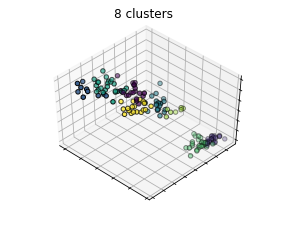

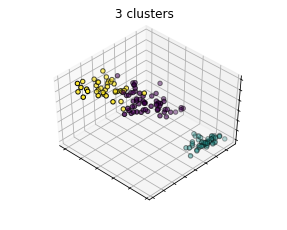

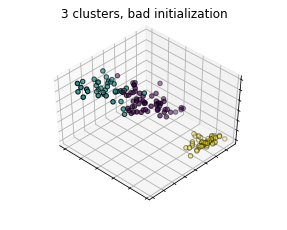

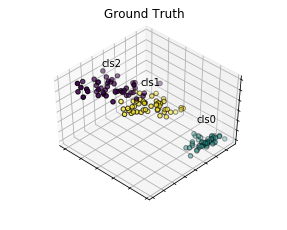

In [16]:
fignum = 1
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    
    ## fit data
    est.fit(X)
    
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('cls0', 0),
                    ('cls1', 1),
                    ('cls2', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_title('Ground Truth')
ax.dist = 12

#fig.show()

In [ ]:
### 設定 模型 估計參數(k_means_10 && k_means_5)

In [17]:
estimators = [('k_means_10', KMeans(n_clusters=10)),
              ('k_means_05', KMeans(n_clusters=5)),
              ('k_means_bad_init', KMeans(n_clusters=3, n_init=1,
                                               init='random'))]

TypeError: Cannot cast array data from dtype('float64') to dtype('int64') according to the rule 'safe'

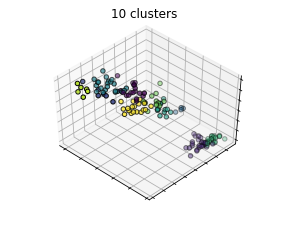

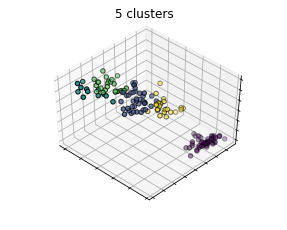

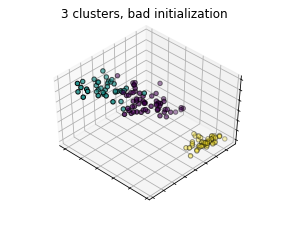

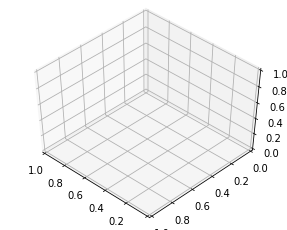

In [18]:
fignum = 1
titles = ['10 clusters', '5 clusters', '3 clusters, bad initialization']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    
    ## fit data
    est.fit(X)
    
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('cls0', 0),
                    ('cls1', 1),
                    ('cls2', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_title('Ground Truth')
ax.dist = 12

#fig.show()